### 09. ReLu

- sigmoid는 양 끝쪽의 미분값(gradient) 값이 너무 작아, 역전파시 사라지게 된다. 
- ReLu는 f(x) = (0, 1) 즉 기울기가 존재하면 무조건 1을 출력한다. 

<img src = 'img/ReLu.png'>

- torch.optim 모듈은 아래와 같이 다양한 최적화 알고리즘들을 지원한다. 
- https://pytorch.org/docs/master/optim.html#torch-optim

<img src = 'img/optim.png'>

- function = ReLu & optimizer = Adam 알고리즘을 사용한 코드 

In [1]:
import torch 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 

device = 'cpu'
#device = 'cuda' if torch.cuda.is_available() else 'cpu'

## parameters
training_epoch = 15 
batch_size = 100
learning_rate = 0.001

## dataset 
mnist_train = dsets.MNIST(root = 'MNIST_data/', 
                          train = True, 
                          transform = transforms.ToTensor(), 
                          download = True )

mnist_test = dsets.MNIST(root = 'MNIST_data/', 
                          train = False, 
                          transform = transforms.ToTensor(), 
                          download = True )

data_loader = torch.utils.data.DataLoader(dataset = mnist_train, 
                                         batch_size = batch_size, 
                                         shuffle = True, 
                                         drop_last = True )

## use 3 layers
linear1 = torch.nn.Linear(28*28, 256, bias = True)
linear2 = torch.nn.Linear(256, 256, bias = True)
linear3 = torch.nn.Linear(256, 10, bias = True)

## 모형들의 weight를 정규분포로 초기화 
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

## model, cost function, optimizer 
## softmax 대신 relu & SGD 대신 Adam 사용 
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, relu, 
                            linear2, relu, 
                            linear3, relu).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

total_batch = len(data_loader)

for epoch in range(training_epoch) : 
    avg_cost = 0 
    for X, Y in data_loader : 
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('epoch:', epoch+1, 'cost=', avg_cost)

epoch: 1 cost= tensor(79.4762, grad_fn=<AddBackward0>)
epoch: 2 cost= tensor(2.3860, grad_fn=<AddBackward0>)
epoch: 3 cost= tensor(2.2885, grad_fn=<AddBackward0>)
epoch: 4 cost= tensor(2.2383, grad_fn=<AddBackward0>)
epoch: 5 cost= tensor(2.2185, grad_fn=<AddBackward0>)
epoch: 6 cost= tensor(2.1947, grad_fn=<AddBackward0>)
epoch: 7 cost= tensor(2.1617, grad_fn=<AddBackward0>)
epoch: 8 cost= tensor(2.1095, grad_fn=<AddBackward0>)
epoch: 9 cost= tensor(2.0654, grad_fn=<AddBackward0>)
epoch: 10 cost= tensor(2.0377, grad_fn=<AddBackward0>)
epoch: 11 cost= tensor(2.0339, grad_fn=<AddBackward0>)
epoch: 12 cost= tensor(2.0506, grad_fn=<AddBackward0>)
epoch: 13 cost= tensor(2.0072, grad_fn=<AddBackward0>)
epoch: 14 cost= tensor(2.0092, grad_fn=<AddBackward0>)
epoch: 15 cost= tensor(2.0068, grad_fn=<AddBackward0>)


c:\python\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\python\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.249099999666214
Label:  1
Prediction:  1


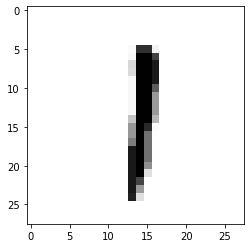

In [2]:
# Test the model using test sets
import random 
import matplotlib.pyplot as plt

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    single_prediction = model(X_single_data)
    print('Label: ', Y_single_data.item())
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()